Завдання 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x0 = 0.43
y0 = x0 + 0.0000001

In [3]:
N = 50
r = 4

Вона приймає значення x0 та параметр r, і повертає наступне значення.
Функція використовується як базовий “крок” динамічної системи.

In [4]:
def logistic_map(x0, r):
    return r * x0 * (1 - x0)

Створюється список x, де перше значення — початкове.
Далі в циклі кожне нове значення обчислюється на основі попереднього.
У результаті отримуємо повну траєкторію системи довжини N.

In [5]:
def calc_iteration(r, N, x0):

    x = []
    x.append(x0)

    for k in range(1, N):
        x.append(logistic_map(x[k-1], r))

    return x

In [6]:
type(calc_iteration(r, N, x0))

list

In [7]:
len(calc_iteration(r, N, x0) )

50

будуємо дві траєкторії системи для майже однакових початкових значень.
Якщо між графіками з’являється помітне розходження — це демонструє чутливість до початкових умов (ознака хаосу).
Графік показує, як змінюється x і y при кожній ітерації.

In [8]:
x = calc_iteration(r, N, x0)
y = calc_iteration(r, N, y0)

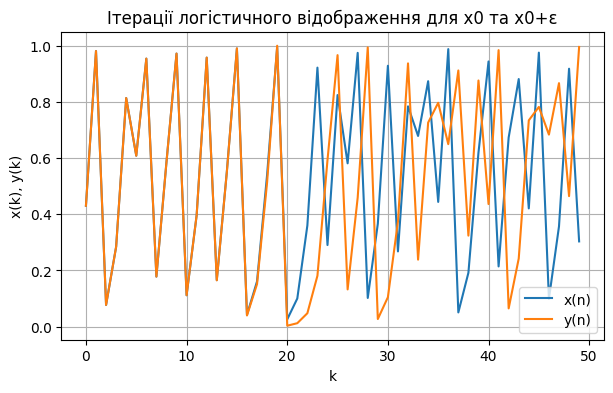

In [9]:
n = range(N)
plt.figure(figsize=(7, 4))
plt.plot(n, x, label='x(n)')
plt.plot(n, y, label='y(n)')
plt.xlabel('k')
plt.ylabel('x(k), y(k)')
plt.title('Ітерації логістичного відображення для x0 та x0+ε')
plt.grid(True)
plt.legend()
plt.show()


Для Показника Ляпунова потрібен логарифм абсолютного значення похідної відображення f(x)=r x(1-x).
Похідна: f’(x)=r − 2rx.
Побудова цих значень допомагає візуально оцінити, де система найшвидше розходиться.

In [10]:
log_deriv_logist = lambda x, r: np.log(np.abs(r - 2 * r * x))

In [11]:
z = [log_deriv_logist(x, r) for x in x]
z_1 = [log_deriv_logist(y, r) for y in y]

Показуємо поведінку логарифмів похідної для двох траєкторій.
Це допомагає побачити, як коливаються значення, що складаються у Показник Ляпунова.

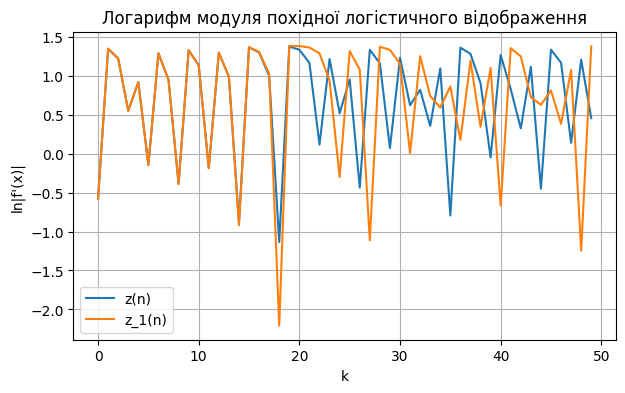

In [12]:
plt.figure(figsize=(7, 4))
plt.plot(z, label='z(n)')
plt.plot(z_1, label='z_1(n)')
plt.xlabel('k')
plt.ylabel('ln|f\'(x)|')
plt.title('Логарифм модуля похідної логістичного відображення')
plt.grid(True)
plt.legend()
plt.show()

фазовий портрет

Фазовий портрет — це графік залежності x(n+1) від x(n).
Якщо система хаотична, точки не повторюються й заповнюють певну область.
Це дає загальну картину поведінки системи.

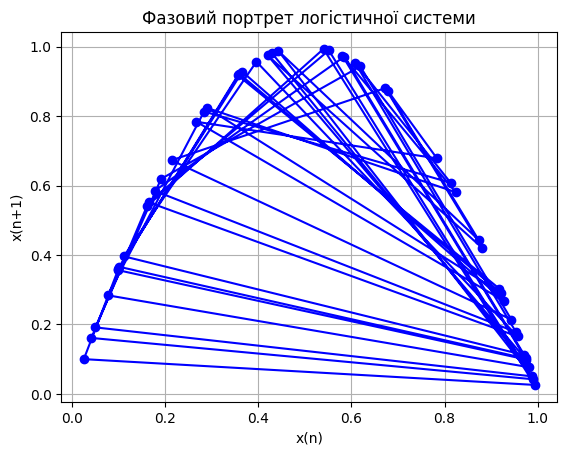

In [13]:
plt.plot(x[:-1], x[1:], marker='o', linestyle='-', color='b')
plt.xlabel("x(n)")
plt.ylabel("x(n+1)")
plt.title("Фазовий портрет логістичної системи")
plt.grid(True)
plt.show()


Завдання 2, 3

In [14]:
r = 2.3
print('x0 =', x0)
print('r =', r)

x0 = 0.43
r = 2.3


Показник Ляпунова = середнє значення логарифмів модуля похідної.
Якщо результат > 0 — система хаотична.
Якщо < 0 — рух стабільний.

In [15]:
LYP = np.sum(z)/N
print('Показник Ляпунова', LYP.round(4))

Показник Ляпунова 0.6869


Функція дозволяє вручну вводити x0 і r.
Після цього вона повторює стандартний алгоритм:

рахує траєкторію

рахує похідну

усереднює значення

повертає ПЛ

Тут реалізовано завдання 2 (фіксоване r) і завдання 3 (будь-яке r ∈ [1,4]).

In [16]:
def Lypunov_x0_r(x0, r, N):

    x = calc_iteration(r, N, x0)
    z = [log_deriv_logist(xk, r) for xk in x]
    LYP = np.sum(z) / N


    return x0, r, round(LYP, 4)

In [17]:
x0, r, L = Lypunov_x0_r(0.43, 3.4, 200)

In [18]:
print(f'Для x0= {x0} та r= {r} показник Ляпунова LYP = {L}')

Для x0= 0.43 та r= 3.4 показник Ляпунова LYP = -0.138


In [19]:
x0, r, L = Lypunov_x0_r(0.3, 3.3, 200)

In [20]:
print(f'Для x0= {x0} та r= {r} показник Ляпунова LYP = {L}')

Для x0= 0.3 та r= 3.3 показник Ляпунова LYP = -0.5612


In [21]:
eps0 = 1e-6
eps_max = 1e-1

T = (1 / LYP) * np.log(eps_max / eps0)
print("Горизонт передбачуваності:", T)

Горизонт передбачуваності: 16.760894742365075


Завдання 4

Це дозволяє оцінити загальну стабільність системи при різних початкових умовах.

In [22]:
def Lypunov_2_r(r, N, k):
    x_k = np.linspace(0, 1, k)
    Loc_Lyp = []

    for x_0 in  x_k:

        x = calc_iteration(r, N, x_0)
        z = [log_deriv_logist(x, r)  for x in x]
        Loc_Lyp.append(np.sum(z)/N)

    LYP = np.sum(Loc_Lyp)/(len(x_k)-1)

    return round(LYP, 4)

In [23]:
Lypunov_2_r(3, N, 1000)

np.float64(-0.0445)

Завдання 5

Для кожного r рахуємо середній ПЛ через попередню функцію.
У результаті маємо графік “ПЛ vs r”, де видно ділянки стабільності й хаосу.

In [24]:
def Lypunov_3_r(m, N):

    r_k = np.linspace(2.5, 4, m)


    LYP_r = []
    for r in r_k:
        LYP_r.append(Lypunov_2_r(r, N, 1000))

    return LYP_r

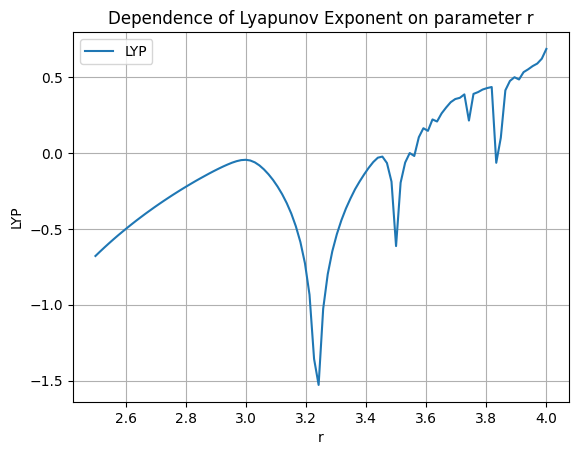

In [25]:
r_k = Lypunov_3_r(100, N)  # 100 рівновіддалених значень r
x = np.linspace(2.5, 4, 100)
y = r_k

fig, ax = plt.subplots()
ax.plot(x, y, label='LYP')
ax.grid(True)
ax.set_xlabel('r')
ax.set_ylabel('LYP')
ax.set_title('Dependence of Lyapunov Exponent on parameter r')
ax.legend()
plt.show()


Будується залежність ПЛ від параметра r.
Де крива вище нуля — хаос.
Де нижче — стабільність.

Завдання 6

In [26]:
def cos_map(x0, lam):
    return lam * np.cos(x0)

In [27]:
def calc_iteration_cos(lam, N, x0):
    x = [x0]
    for k in range(1, N):
        x.append(cos_map(x[k-1], lam))
    return x

In [28]:
log_deriv_cos = lambda x, lam: np.log(np.abs(-lam * np.sin(x)) + 1e-12)

In [29]:
def Lyapunov_cos_x0_lam(x0, lam, N):

    x = calc_iteration_cos(lam, N, x0)
    z = [log_deriv_cos(x_i, lam) for x_i in x]

    LYP = np.sum(z) / N
    return x0, lam, round(LYP, 4)

In [30]:
def Lyapunov_cos_multi(lam, N, k):
    x_k = np.linspace(0, 1, k)
    Loc_Lyp = []

    for x0 in x_k:
        x = calc_iteration_cos(lam, N, x0)
        z = [log_deriv_cos(x_i, lam) for x_i in x]
        Loc_Lyp.append(np.sum(z) / N)

    return round(np.mean(Loc_Lyp), 4)

In [31]:
def Lyapunov_cos_range(m, N):
    lam_values = np.linspace(0, 3, m)
    LYP_values = []
    for lam in lam_values:
        LYP_values.append(Lyapunov_cos_multi(lam, N, 500))
    return lam_values, LYP_values

In [32]:
x0 = 0.4
lam = 2.5
N = 1000

x0, lam, L = Lyapunov_cos_x0_lam(x0, lam, N)
print("Показник Ляпунова =", L)

Показник Ляпунова = 0.509


In [33]:
lam = 2.5
N = 1000
k = 500

L = Lyapunov_cos_multi(lam, N, k)
print("Усереднений ПЛ =", L)

Усереднений ПЛ = 0.4984


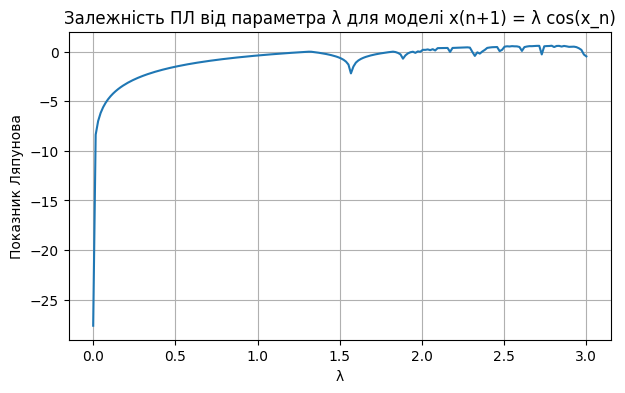

In [34]:
lam_values, LYP_values = Lyapunov_cos_range(200, 500)

plt.figure(figsize=(7,4))
plt.plot(lam_values, LYP_values)
plt.xlabel("λ")
plt.ylabel("Показник Ляпунова")
plt.title("Залежність ПЛ від параметра λ для моделі x(n+1) = λ cos(x_n)")
plt.grid(True)
plt.show()